In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning.pytorch import Trainer

# Import our analysis modules
from library.analysis import UniversalModelAnalyzer, analyze_universal_output_layer_tsne
from library.models.universal_resnet import UniversalResNetModel
from library.taxonomy import Taxonomy
from library.datasets.caltech101 import Caltech101DataModule
from library.datasets.caltech256 import Caltech256DataModule
from library.datasets.cifar100 import CIFAR100ScaledDataModule
from library.datasets.util import CombinedDataModule

# Set up for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("Imports completed successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device available: {'CUDA' if torch.cuda.is_available() else 'CPU'}")

Imports completed successfully!
PyTorch version: 2.6.0+cu126
Device available: CUDA


In [8]:
# Load the MCFP three domain taxonomy and model
three_domain_mcfp_taxonomy = Taxonomy.load("taxonomies/three_domain_mcfp.pkl")

print(
    f"Loaded MCFP three domain taxonomy with {len(three_domain_mcfp_taxonomy.get_nodes())} nodes"
)
print(
    f"Universal classes: {len([n for n in three_domain_mcfp_taxonomy.get_nodes() if hasattr(n, 'universal_class_id')])}"
)

# Load the trained MCFP three domain model
model_checkpoint = "checkpoints/universal-resnet50-three-domain-mcfp-min-val-loss.ckpt"

print(f"Loading pre-trained model: {model_checkpoint}")
model = UniversalResNetModel.load_from_checkpoint(
    model_checkpoint,
    taxonomy=three_domain_mcfp_taxonomy,  # Need to pass taxonomy since it's not serialized
)

print(f"Model loaded successfully!")
print(f"Number of universal classes in model: {model.num_universal_classes}")
print(f"Model architecture: {model.architecture}")

Loaded MCFP three domain taxonomy with 1244 nodes
Universal classes: 0
Loading pre-trained model: checkpoints/universal-resnet50-three-domain-mcfp-min-val-loss.ckpt
Model loaded successfully!
Number of universal classes in model: 786
Model architecture: resnet50
Model loaded successfully!
Number of universal classes in model: 786
Model architecture: resnet50


In [9]:
# Create individual dataset modules
caltech101_dm = Caltech101DataModule(batch_size=32)
caltech256_dm = Caltech256DataModule(batch_size=32)
cifar100_dm = CIFAR100ScaledDataModule(batch_size=32)

# Create three-domain combined data module
# Domain 0: Caltech-101, Domain 1: Caltech-256, Domain 2: CIFAR-100
three_domain_dataset_module = CombinedDataModule(
    dataset_modules=[caltech101_dm, caltech256_dm, cifar100_dm],
    domain_ids=[0, 1, 2],
    batch_size=32,  # Smaller batch size for visualization
    num_workers=4,  # Reduced for better memory management
)

# Setup the dataset modules
three_domain_dataset_module.setup()

print("Dataset modules created and set up successfully!")
print(f"Train dataset size: {len(three_domain_dataset_module.train)}")
print(f"Test dataset size: {len(three_domain_dataset_module.test)}")

# Get test dataloader for analysis
test_dataloader = three_domain_dataset_module.test_dataloader()
print(f"Test dataloader created with batch size: {test_dataloader.batch_size}")

Dataset modules created and set up successfully!
Train dataset size: 71428
Test dataset size: 13927
Test dataloader created with batch size: 32


Starting t-SNE analysis of the universal output layer...
This may take a few minutes...
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.704571
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.704571
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.452835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.452835
[t-SNE] KL divergence after 1000 iterations: 0.640040
t-SNE completed. Final KL divergence: 0.6400
[t-SNE] KL divergence after 1000 iterations: 0.640040
t-SNE completed. Final KL d

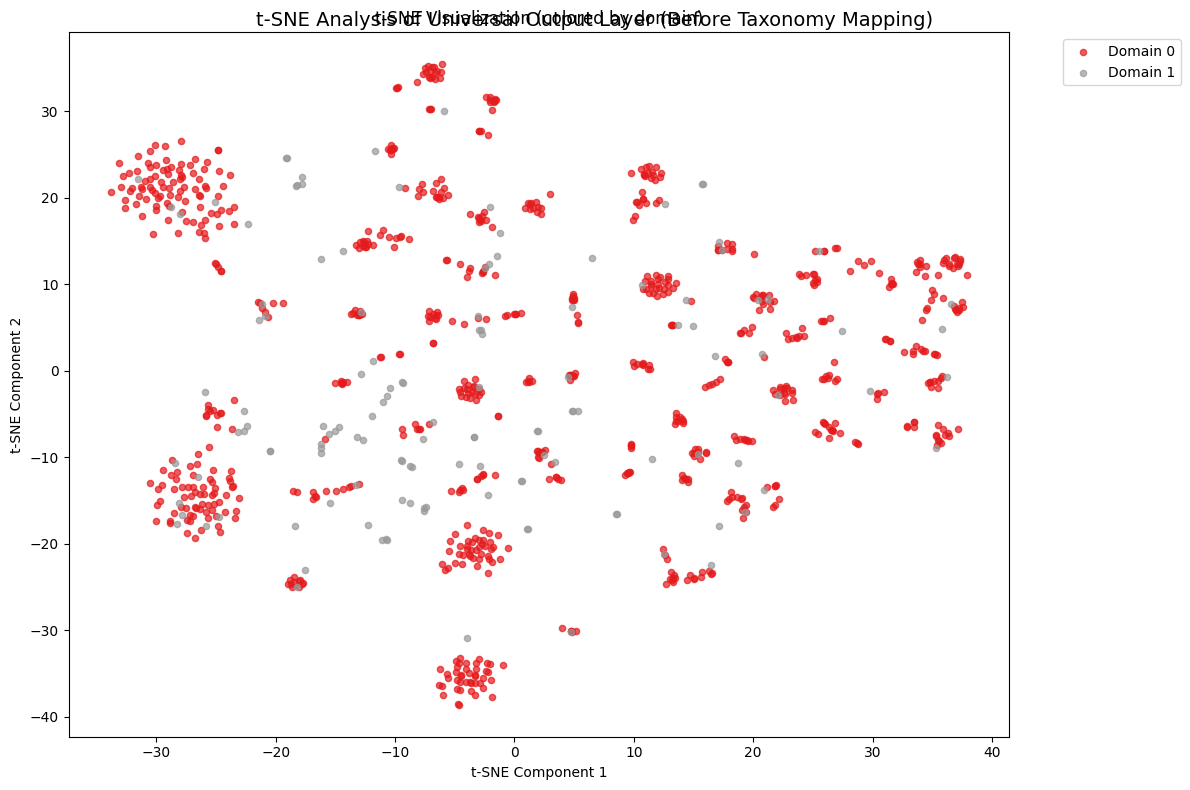

In [10]:
# Analyze the universal output layer with t-SNE
print("Starting t-SNE analysis of the universal output layer...")
print("This may take a few minutes...")

# Use the convenience function to analyze the universal output layer
features, embeddings, fig = analyze_universal_output_layer_tsne(
    model=model,
    dataloader=test_dataloader,
    max_samples=1000,  # Limit samples for reasonable computation time
    perplexity=30.0,  # Good default for visualization
    color_by="domain",  # Color by domain to see domain separation
    save_path="output/universal_output_layer_tsne_mcfp_three_domain.png",
)

print(f"Analysis complete!")
print(f"Universal features shape: {features.shape}")
print(f"t-SNE embeddings shape: {embeddings.shape}")

# Display the plot
plt.show()

Creating additional visualizations...
Extracting universal features...
Applying t-SNE...
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.782730
Applying t-SNE...
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.782730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.194733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.194733
[t-SNE] KL divergence after 1000 iterations: 0.641788
t-SNE completed. Final KL divergence: 0.6418
[t-SNE] KL divergence after 1000 iterations: 0.641788
t-SNE co

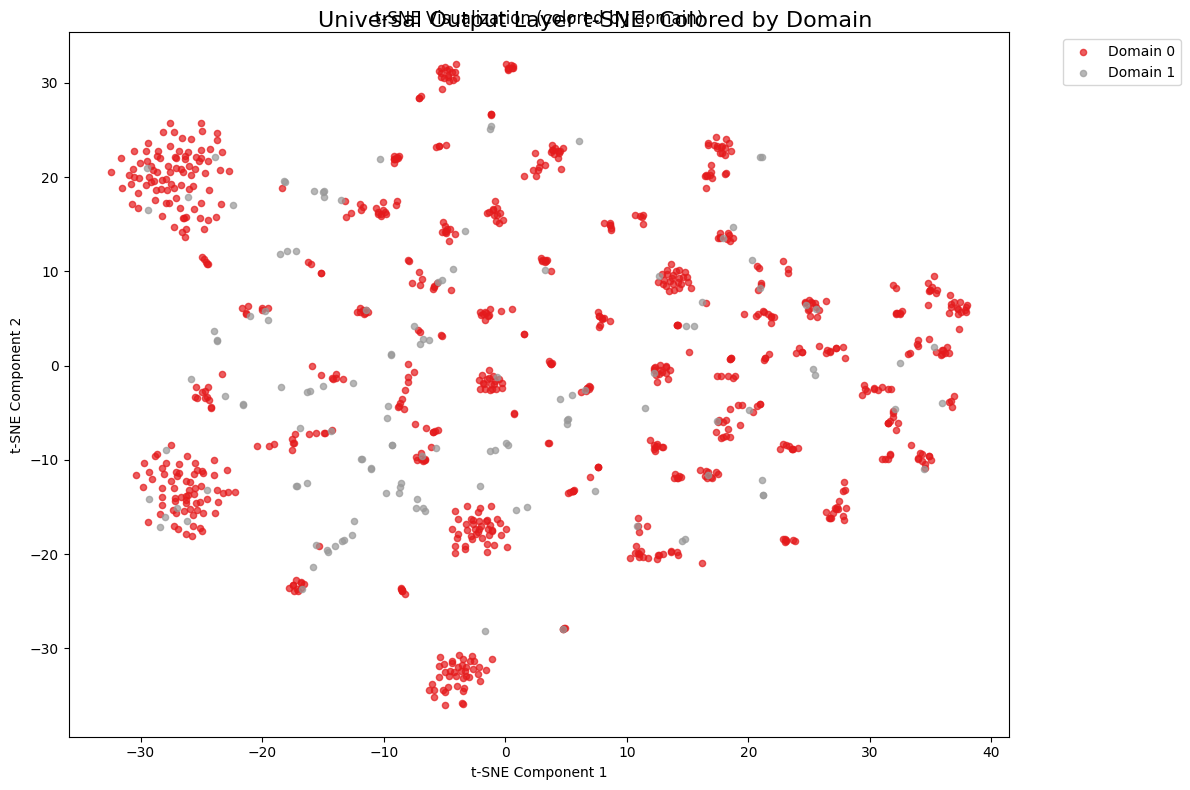

Too many classes (195) for legend. Legend omitted.


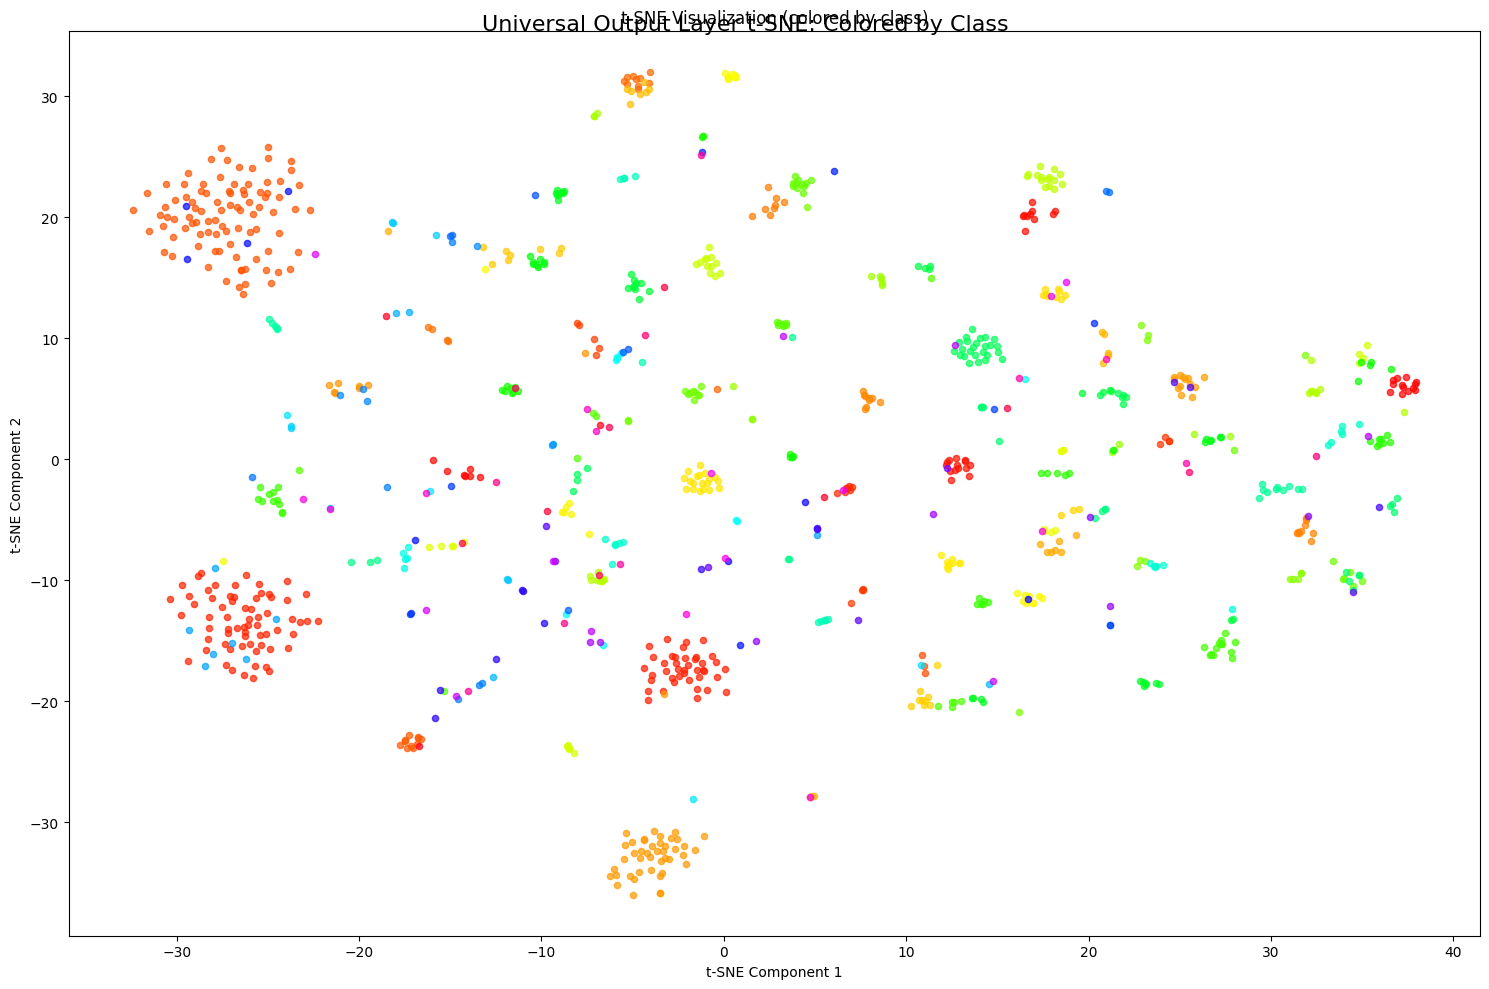

Too many classes (195) for legend. Legend omitted.


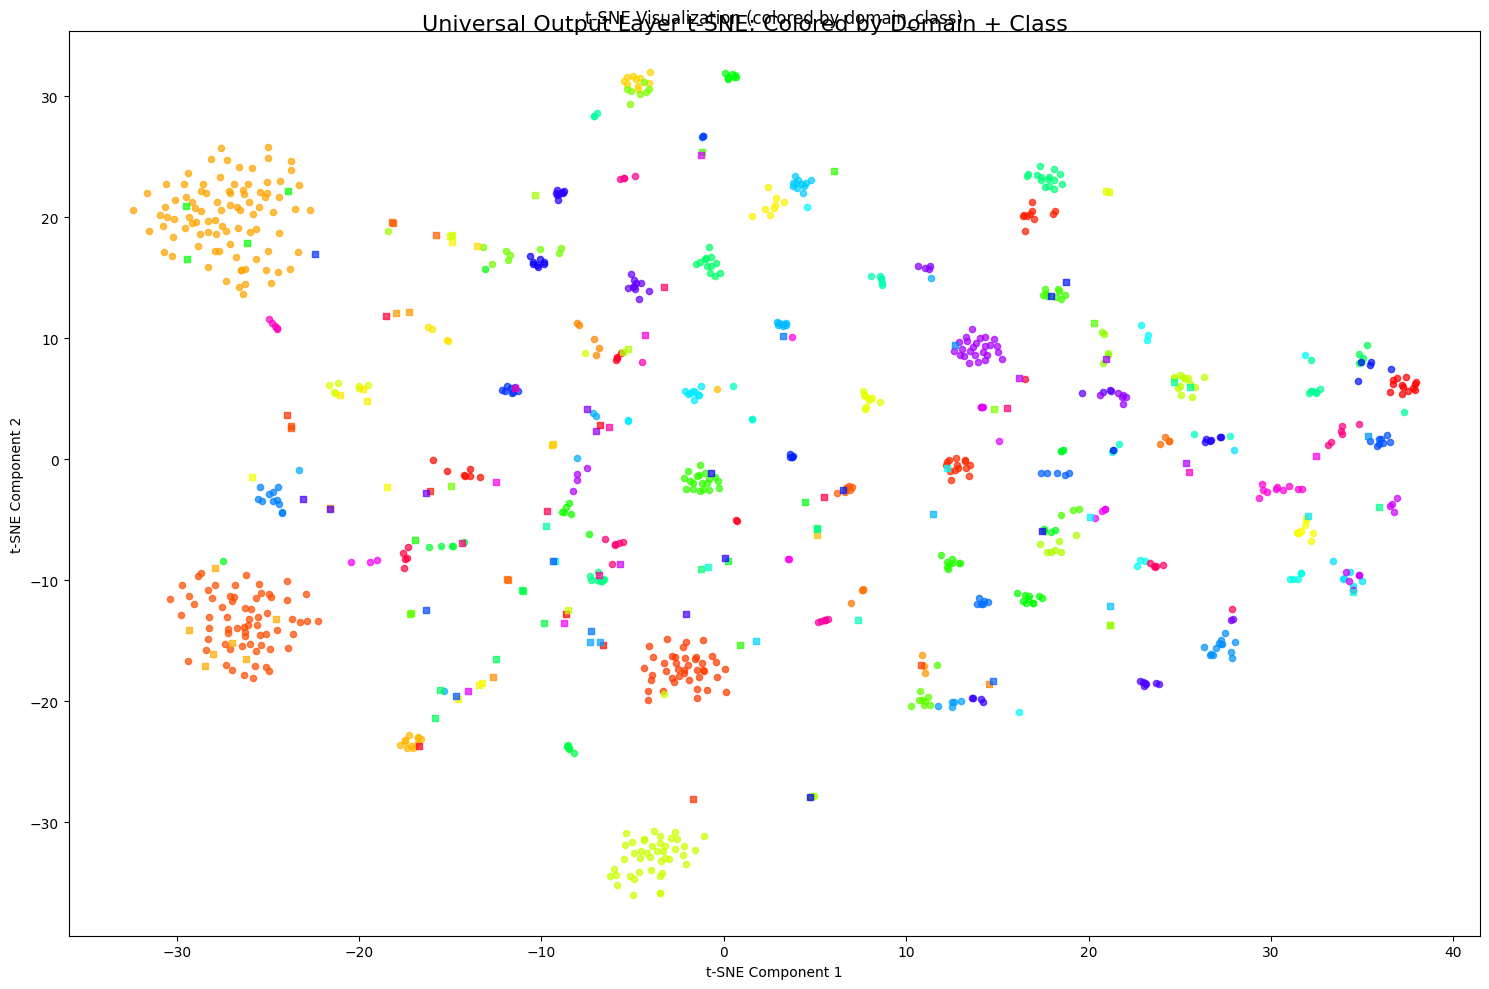

All visualizations created and saved!


In [11]:
# Create additional visualizations with different color schemes
print("Creating additional visualizations...")

# Initialize the analyzer for more detailed analysis
analyzer = UniversalModelAnalyzer(
    model, device="cuda" if torch.cuda.is_available() else "cpu"
)

# Get the same features and labels from the previous analysis
print("Extracting universal features...")
features, labels, class_names = analyzer.extract_universal_features(
    test_dataloader, max_samples=1000
)

# Apply t-SNE once
print("Applying t-SNE...")
embeddings = analyzer.apply_tsne(features, perplexity=30.0)

# Create different visualizations
fig_domain = analyzer.visualize_tsne(
    embeddings, labels, class_names, color_by="domain", figsize=(12, 8)
)
fig_domain.suptitle("Universal Output Layer t-SNE: Colored by Domain", fontsize=16)
fig_domain.savefig("output/universal_tsne_by_domain.png", dpi=300, bbox_inches="tight")
plt.show()

fig_class = analyzer.visualize_tsne(
    embeddings, labels, class_names, color_by="class", figsize=(15, 10)
)
fig_class.suptitle("Universal Output Layer t-SNE: Colored by Class", fontsize=16)
fig_class.savefig("output/universal_tsne_by_class.png", dpi=300, bbox_inches="tight")
plt.show()

fig_domain_class = analyzer.visualize_tsne(
    embeddings, labels, class_names, color_by="domain_class", figsize=(15, 10)
)
fig_domain_class.suptitle(
    "Universal Output Layer t-SNE: Colored by Domain + Class", fontsize=16
)
fig_domain_class.savefig(
    "output/universal_tsne_by_domain_class.png", dpi=300, bbox_inches="tight"
)
plt.show()

print("All visualizations created and saved!")

Comparing universal output layer with penultimate layer features...
Extracting penultimate layer features...
Universal output features shape: (1000, 786)
Penultimate layer features shape: (1000, 1024)
Applying t-SNE to penultimate layer features...
Applying t-SNE to 1000 samples with 1024 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.187126
Universal output features shape: (1000, 786)
Penultimate layer features shape: (1000, 1024)
Applying t-SNE to penultimate layer features...
Applying t-SNE to 1000 samples with 1024 features...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.187126
[t-SNE] KL divergence after 250 i

/tmp/ipykernel_3056/3531178563.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1")(np.linspace(0, 1, len(unique_domains)))


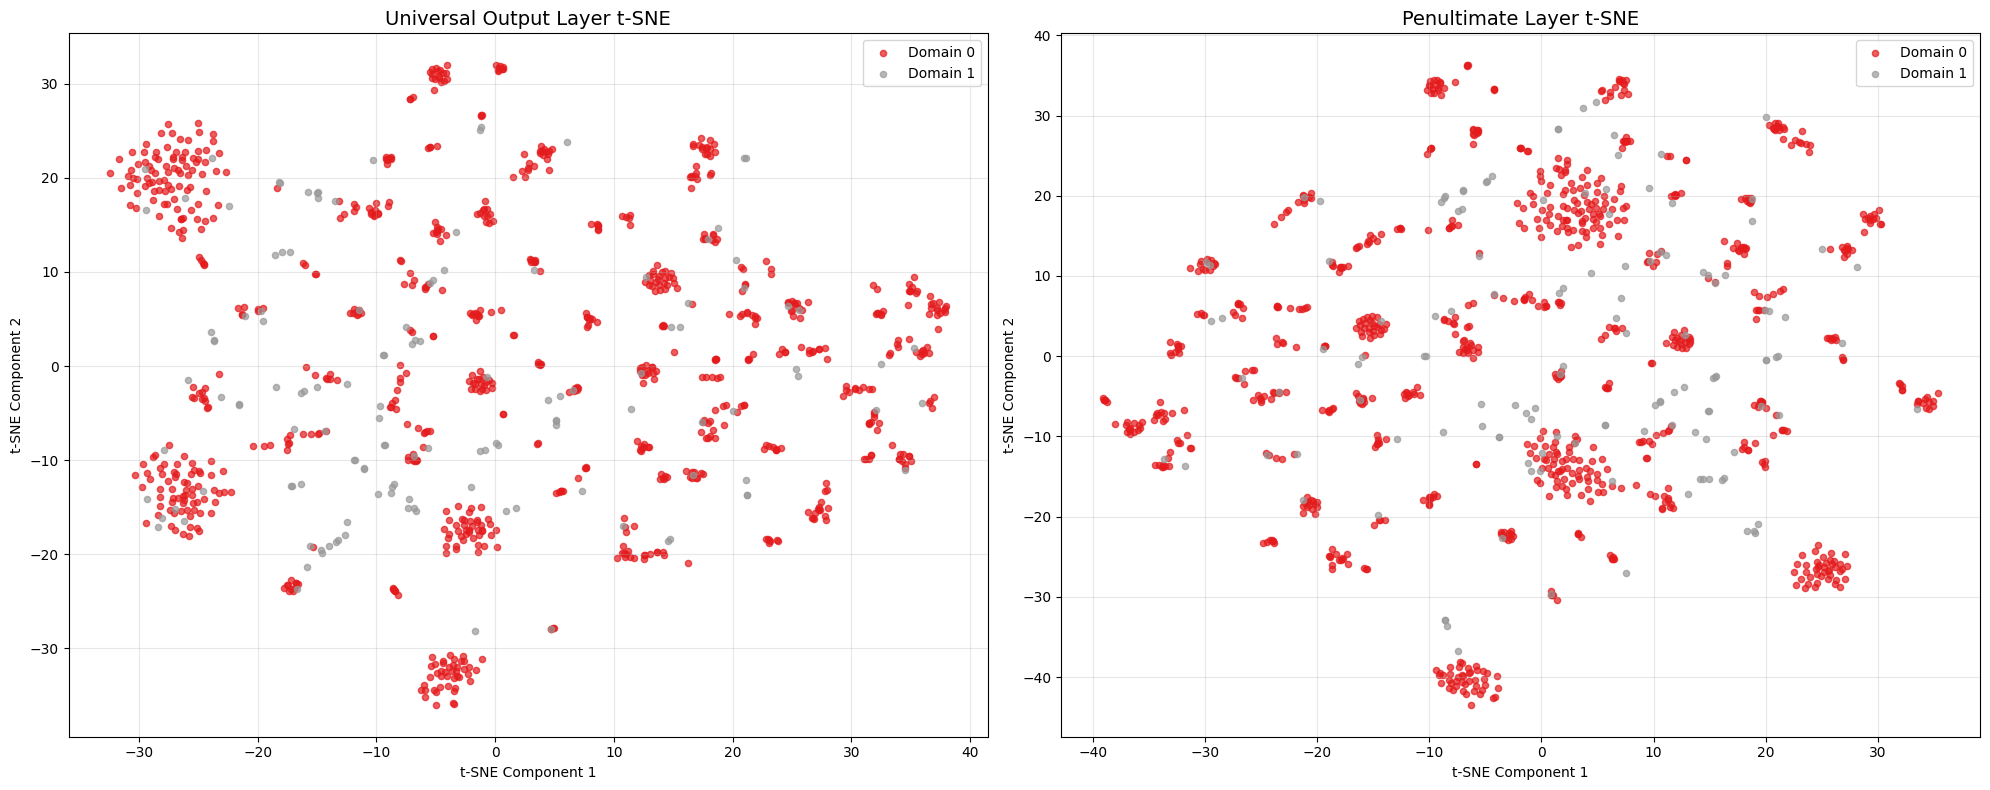

Comparison visualization created!


In [12]:
# Compare universal output layer with penultimate layer features
print("Comparing universal output layer with penultimate layer features...")

# Extract features from penultimate layer (using hooks)
print("Extracting penultimate layer features...")
penult_features, penult_labels, penult_class_names = analyzer.extract_features(
    test_dataloader, max_samples=1000
)

print(f"Universal output features shape: {features.shape}")
print(f"Penultimate layer features shape: {penult_features.shape}")

# Apply t-SNE to penultimate features
print("Applying t-SNE to penultimate layer features...")
penult_embeddings = analyzer.apply_tsne(penult_features, perplexity=30.0)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot universal output layer
import pandas as pd

df_universal = pd.DataFrame(
    {
        "x": embeddings[:, 0],
        "y": embeddings[:, 1],
        "domain_id": [label[0] for label in labels],
    }
)

unique_domains = df_universal["domain_id"].unique()
colors = plt.cm.get_cmap("Set1")(np.linspace(0, 1, len(unique_domains)))

for i, domain in enumerate(unique_domains):
    domain_data = df_universal[df_universal["domain_id"] == domain]
    ax1.scatter(
        domain_data["x"],
        domain_data["y"],
        c=[colors[i]],
        label=f"Domain {domain}",
        alpha=0.7,
        s=20,
    )

ax1.set_title("Universal Output Layer t-SNE", fontsize=14)
ax1.set_xlabel("t-SNE Component 1")
ax1.set_ylabel("t-SNE Component 2")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot penultimate layer
df_penult = pd.DataFrame(
    {
        "x": penult_embeddings[:, 0],
        "y": penult_embeddings[:, 1],
        "domain_id": [label[0] for label in penult_labels],
    }
)

for i, domain in enumerate(unique_domains):
    domain_data = df_penult[df_penult["domain_id"] == domain]
    ax2.scatter(
        domain_data["x"],
        domain_data["y"],
        c=[colors[i]],
        label=f"Domain {domain}",
        alpha=0.7,
        s=20,
    )

ax2.set_title("Penultimate Layer t-SNE", fontsize=14)
ax2.set_xlabel("t-SNE Component 1")
ax2.set_ylabel("t-SNE Component 2")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(
    "output/universal_vs_penultimate_comparison.png", dpi=300, bbox_inches="tight"
)
plt.show()

print("Comparison visualization created!")

Testing different perplexity values...
Running t-SNE with perplexity 5...
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.933240
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.589157
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.589157
[t-SNE] KL divergence after 1000 iterations: 0.624840
t-SNE completed. Final KL divergence: 0.6248
Running t-SNE with perplexity 15...
Applying t-SNE to 1000 samples with 786 features...
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.828117
[t-SNE] KL divergence after 1000 iterations: 0.624840
t-SNE

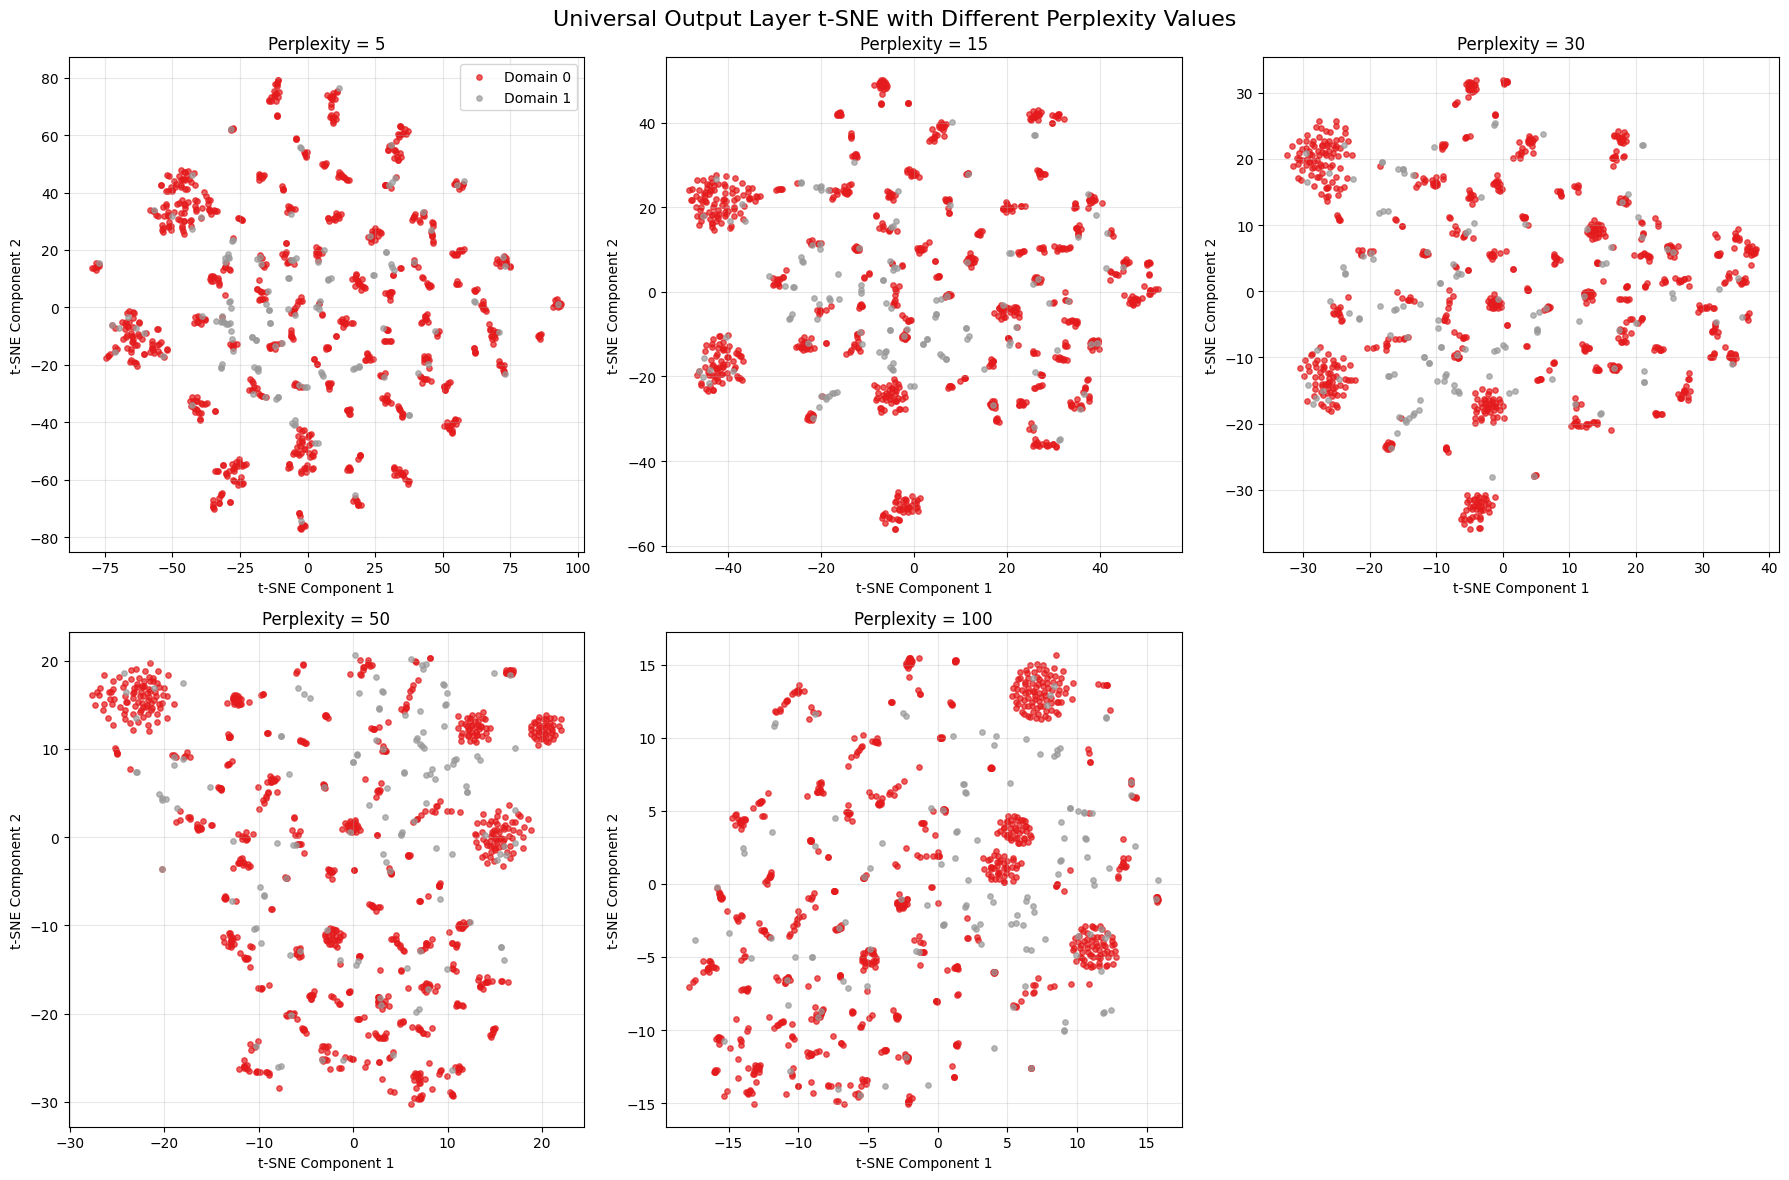

Perplexity comparison completed!


In [13]:
# Experiment with different perplexity values for the universal output layer
print("Testing different perplexity values...")

perplexity_values = [5, 15, 30, 50, 100]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, perp in enumerate(perplexity_values):
    print(f"Running t-SNE with perplexity {perp}...")
    perp_embeddings = analyzer.apply_tsne(features, perplexity=perp, random_state=42)

    ax = axes[idx]

    # Create DataFrame for plotting
    df_perp = pd.DataFrame(
        {
            "x": perp_embeddings[:, 0],
            "y": perp_embeddings[:, 1],
            "domain_id": [label[0] for label in labels],
        }
    )

    # Plot each domain
    for i, domain in enumerate(unique_domains):
        domain_data = df_perp[df_perp["domain_id"] == domain]
        ax.scatter(
            domain_data["x"],
            domain_data["y"],
            c=[colors[i]],
            label=f"Domain {domain}",
            alpha=0.7,
            s=15,
        )

    ax.set_title(f"Perplexity = {perp}", fontsize=12)
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.grid(True, alpha=0.3)

    if idx == 0:  # Only show legend for first plot
        ax.legend()

# Remove the empty subplot
if len(perplexity_values) < len(axes):
    axes[-1].remove()

plt.suptitle(
    "Universal Output Layer t-SNE with Different Perplexity Values", fontsize=16
)
plt.tight_layout()
plt.savefig(
    "output/universal_tsne_perplexity_comparison.png", dpi=300, bbox_inches="tight"
)
plt.show()

print("Perplexity comparison completed!")

In [15]:
# Domain distribution in the sample
domain_counts = {}
for label in labels:
    domain_id = label[0]
    domain_counts[domain_id] = domain_counts.get(domain_id, 0) + 1

print("Domain distribution in sample:")
domain_names = {0: "Caltech-101", 1: "Caltech-256", 2: "CIFAR-100"}
for domain_id, count in domain_counts.items():
    percentage = (count / len(labels)) * 100
    print(
        f"  - Domain {domain_id} ({domain_names[domain_id]}): {count} samples ({percentage:.1f}%)"
    )
print()

# Feature statistics
print("Feature Analysis:")
print(f"Universal output features shape: {features.shape}")
print(f"  - {features.shape[0]} samples")
print(f"  - {features.shape[1]} universal class dimensions")
print()
print(f"Penultimate layer features shape: {penult_features.shape}")
print(f"  - {penult_features.shape[0]} samples")
print(f"  - {penult_features.shape[1]} feature dimensions")
print()

# Feature statistics
print("Universal output feature statistics:")
print(f"  - Mean: {np.mean(features):.4f}")
print(f"  - Std: {np.std(features):.4f}")
print(f"  - Min: {np.min(features):.4f}")
print(f"  - Max: {np.max(features):.4f}")
print()

print("Files saved:")
print("  - universal_output_layer_tsne_mcfp_three_domain.png")
print("  - universal_tsne_by_domain.png")
print("  - universal_tsne_by_class.png")
print("  - universal_tsne_by_domain_class.png")
print("  - universal_vs_penultimate_comparison.png")
print("  - universal_tsne_perplexity_comparison.png")
print()
print("Analysis complete! 🎉")

Domain distribution in sample:
  - Domain 0 (Caltech-101): 867 samples (86.7%)
  - Domain 1 (Caltech-256): 133 samples (13.3%)

Feature Analysis:
Universal output features shape: (1000, 786)
  - 1000 samples
  - 786 universal class dimensions

Penultimate layer features shape: (1000, 1024)
  - 1000 samples
  - 1024 feature dimensions

Universal output feature statistics:
  - Mean: 0.2404
  - Std: 1.1001
  - Min: -5.5265
  - Max: 12.8313

Files saved:
  - universal_output_layer_tsne_mcfp_three_domain.png
  - universal_tsne_by_domain.png
  - universal_tsne_by_class.png
  - universal_tsne_by_domain_class.png
  - universal_vs_penultimate_comparison.png
  - universal_tsne_perplexity_comparison.png

Analysis complete! 🎉
